---
title: Neural Networks
teaching: 20
exercises: 30
---

:::::::::::::::::::::::::::::::::::::: questions 

- What are Neural Networks?
- How can we classify images using a neural network?

::::::::::::::::::::::::::::::::::::::::::::::::

::::::::::::::::::::::::::::::::::::: objectives

- Understand the basic architecture of a perceptron.
- Be able to create a perceptron to encode a simple function.
- Understand that layers of perceptrons allow non-linear separable problems to be solved.
- Train a multi-layer perceptron using Scikit-Learn.
- Evaluate the accuracy of a multi-layer perceptron using real input data.
- Understand that cross validation allows the entire data set to be used in the training process.

::::::::::::::::::::::::::::::::::::::::::::::::

# Neural networks

Neural networks are a machine learning method inspired by how the human brain works. They are particularly good at pattern recognition and classification tasks, often using images as inputs. They are a well-established machine learning technique, having been around since the 1950s, but they've gone through several iterations to overcome limitations in previous generations. Using state-of-the-art neural networks is often referred to as 'deep learning'.

## Perceptrons

Perceptrons are the building blocks of neural networks. They are an artificial version of a single neuron in the brain. They typically have one or more inputs and a single output. Each input will be multiplied by a weight and the value of all the weighted inputs are then summed together. Finally, the summed value is put through an activation function which decides if the neuron "fires" a signal. In some cases, this activation function is simply a threshold step function which outputs zero below a certain input and one above it. Other designs of neurons use other activation functions, but typically they have an output between zero and one and are still step-like in their nature.

![A diagram of a perceptron](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn-v2/main/episodes/fig/perceptron.svg)

### Coding a perceptron

Below is an example of a perceptron written as a Python function. The function takes three parameters: `Inputs` is a list of input values, `Weights` is a list of weight values and `Threshold` is the activation threshold.

First we multiply each input by the corresponding weight. To do this quickly and concisely, we will use the numpy multiply function which can multiply each item in a list by a corresponding item in another list.

We then take the sum of all the inputs multiplied by their weights. Finally, if this value is less than the activation threshold, we output zero, otherwise we output a one.

In [1]:
import numpy as np
def perceptron(inputs, weights, threshold):

    assert len(inputs) == len(weights)

    # multiply the inputs and weights
    values = np.multiply(inputs,weights)

    # sum the results
    total = sum(values)

    # decide if we should activate the perceptron
    if total < threshold:
        return 0
    else:
        return 1

### Computing with a perceptron

A single perceptron can perform basic linear classification problems such as computing the logical AND, OR, and NOT functions.

OR

| Input 1 | Input 2 | Output |
| --------|---------|--------|
| 0       |0        |0       |
| 0       |1        |1       |
| 1       |0        |1       |
| 1       |1        |1       |

AND

| Input 1 | Input 2 | Output |
| --------|---------|--------|
| 0       |0        |0       |
| 0       |1        |0       |
| 1       |0        |0       |
| 1       |1        |1       |


NOT

| Input 1 |Output |
| --------|--------|
| 0       |1       |
| 1       |0       |


We can get a single perceptron to compute each of these functions

OR:

In [2]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 0.5))

[0.0, 0.0] 0
[1.0, 0.0] 1
[0.0, 1.0] 1
[1.0, 1.0] 1


AND:

In [3]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 1.0))

[0.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 0
[1.0, 1.0] 1


NOT:

The NOT function only has a single input. To make it work in the perceptron we need to introduce a bias term which is always the same value. In this example it is the second input. It has a weight of 1.0 while the weight on the real input is -1.0.

In [4]:
inputs = [[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [-1.0,1.0], 1.0))

[0.0, 1.0] 1
[1.0, 1.0] 0


A perceptron can be trained to compute any function which has linear separability. A simple training algorithm called the perceptron learning algorithm can be used to do this and Scikit-Learn has its own implementation of it. We are going to skip over the perceptron learning algorithm and move straight onto more powerful techniques. If you want to learn more about it see [this page](https://computing.dcu.ie/~humphrys/Notes/Neural/single.neural.html) from Dublin City University.



### Perceptron limitations

A single perceptron cannot solve any function that is not linearly separable, meaning that we need to be able to divide the classes of inputs and outputs with a straight line. A common example of this is the XOR function shown below:

| Input 1 | Input 2 | Output |
| --------|---------|--------|
| 0       |0        |0       |
| 0       |1        |1       |
| 1       |0        |1       |
| 1       |1        |0       |

(Make a graph of this)

This function outputs a zero when all its inputs are one or zero and its not possible to separate with a straight line. This is known as linear separability. When this limitation was discovered in the 1960s it effectively halted development of neural networks for over a decade in a period known as the "AI Winter".


## Multi-layer perceptrons

A single perceptron cannot be used to solve a non-linearly separable function. For that, we need to use multiple perceptrons and typically multiple layers of perceptrons. They are formed of networks of artificial neurons which each take one or more inputs and typically have a single output. The neurons are connected together in networks of 10s to 1000s of neurons. Typically, networks are connected in layers with an input layer, middle or hidden layer (or layers), and finally an output layer.

![A multi-layer perceptron](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn-v2/main/episodes/fig/multilayer_perceptron.svg)

### Training multi-layer perceptrons

Multi-layer perceptrons need to be trained by showing them a set of training data and measuring the error between the network's predicted output and the true value. Training takes an iterative approach that improves the network a little each time a new training example is presented. There are a number of training algorithms available for a neural network today, but we are going to use one of the best established and well known, the backpropagation algorithm. This algorithm is called back propagation because it takes the error calculated between an output of the network and the true value and takes it back through the network to update the weights. If you want to read more about back propagation, please see [this chapter](http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf) from the book "Neural Networks - A Systematic Introduction".

### Multi-layer perceptrons in Scikit-Learn

We are going to build a multi-layer perceptron for recognising handwriting from images. Scikit-Learn includes some example handwriting data from the [MNIST data set](http://yann.lecun.com/exdb/mnist/), which is a dataset containing 70,000 images of hand-written digits. Each image is 28x28 pixels in size (784 pixels in total) and is represented in grayscale with values between zero for fully black and 255 for fully white. This means we will need 784 perceptrons in our input layer, each taking the input of one pixel and 10 perceptrons in our output layer to represent each digit we might classify. If trained correctly, only the perceptron in the output layer will "fire" to represent the contents of the image (but this is a massive oversimplification!).

We can import this dataset from `sklearn.datasets` then load it into memory by calling the `fetch_openml` function.

In [5]:
import sklearn.datasets as skl_data
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)

This creates two arrays of data, one called `data` which contains the image data and the other `labels` that contains the labels for those images which will tell us which digit is in the image. A common convention is to call the data `X` and the labels `y`.

As neural networks typically want to work with data that ranges between 0 and 1.0 we need to normalise our data to this range. Python has a shortcut which lets us divide the entire data array by 255 and store the result, we can simply do:

In [6]:
data = data / 255.0

This is instead of writing a loop ourselves to divide every pixel by 255. Although the final result is the same and will take about the same amount of computation (possibly a little less, it might do some clever optimisations).

Now we need to initialise a neural network. Scikit-Learn has an entire library for this (`sklearn.neural_network`) and the `MLPClassifier` class handles multi-layer perceptrons. This network takes a few parameters including the size of the hidden layer, the maximum number of training iterations we're going to allow, the exact algorithm to use, whether or not we'd like verbose output about what the training is doing, and the initial state of the random number generator.

In scikit-learn's `MLPClassifier`, the `hidden_layer_sizes` parameter specifies the number and size of hidden layers in the neural network. For example, `hidden_layer_sizes=(50,)` creates a single hidden layer with 50 neurons, while `(100, 50)` creates two hidden layers with 100 and 50 neurons, respectively. It’s important to include the trailing comma for a single hidden layer (e.g., `(50,)`) because without it, `(50)` would be interpreted as an integer, not a tuple, and cause an error. The example, `MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1)`, builds a neural network with one hidden layer containing 50 neurons, runs for a maximum of 50 iterations, logs training progress, and ensures reproducibility with `random_state=1`.

The max_iter parameter in MLPClassifier specifies the maximum number of iterations, not epochs. Since MLPClassifier uses stochastic gradient descent (or its variants), each iteration processes a small random subset of the data (a batch), and the full dataset may not be seen in a single iteration.

In [7]:
import sklearn.neural_network as skl_nn
mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1)

We now have a neural network but we have not trained it yet. Before training, we will split our dataset into two parts: a training set which we will use to train the classifier and a test set which we will use to see how well the training is working. By using different data for the two, we can avoid 'over-fitting', which is the creation of models which do not "generalise" or work with data other than their training data.

Typically, the majority of the data will be used as training data (70-90%), to help avoid overfitting. Let us see how big our dataset is to decide how many samples we want to train with.

In [8]:
data.shape

(70000, 784)

This tells us we have 70,000 rows in the dataset. Let us take 90% of the data for training and 10% for testing, so we will use the first 63,000 samples in the dataset as the training data and the last 7,000 as the test data.

In [9]:
from sklearn.model_selection import train_test_split

# Assuming `data` is your feature matrix and `labels` is your target vector
X_train, X_test, y_train, y_test = train_test_split(
    data.values,        # Features
    labels.values,      # Labels
    test_size=0.1,      # Reserve 10% of data for testing
    random_state=42     # For reproducibility
)
X_train.shape

(63000, 784)

Now lets train the network. This line will take about one minute to run. We do this by calling the `fit` function inside the `mlp` class instance. This needs two arguments: the data itself, and the labels showing what class each item should be classified to.

In [10]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.50503964
Iteration 2, loss = 0.24156069
Iteration 3, loss = 0.19081748
Iteration 4, loss = 0.16082810
Iteration 5, loss = 0.13878497
Iteration 6, loss = 0.12195098
Iteration 7, loss = 0.10894577
Iteration 8, loss = 0.09876658
Iteration 9, loss = 0.08988907
Iteration 10, loss = 0.08278606
Iteration 11, loss = 0.07554156
Iteration 12, loss = 0.07044946
Iteration 13, loss = 0.06451531
Iteration 14, loss = 0.06043697
Iteration 15, loss = 0.05605789
Iteration 16, loss = 0.05186282
Iteration 17, loss = 0.04898347
Iteration 18, loss = 0.04530910
Iteration 19, loss = 0.04287527
Iteration 20, loss = 0.04020489
Iteration 21, loss = 0.03780149
Iteration 22, loss = 0.03529127
Iteration 23, loss = 0.03395980
Iteration 24, loss = 0.03160348
Iteration 25, loss = 0.02934723
Iteration 26, loss = 0.02786874
Iteration 27, loss = 0.02617684
Iteration 28, loss = 0.02450921
Iteration 29, loss = 0.02303041
Iteration 30, loss = 0.02155746
Iteration 31, loss = 0.02079762
Iteration 32, los

/Users/luciusjmorningstar/Desktop/ML_workshop/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,1


Finally, we will score the accuracy of our network against both the original training data and the test data. If the training had converged to the point where each iteration of training was not improving the accuracy, then the accuracy of the training data should be 1.0 (100%).

In [11]:
print("Training set score", mlp.score(X_train, y_train))
print("Testing set score", mlp.score(X_test, y_test))

Training set score 0.9996507936507937
Testing set score 0.9697142857142858


### Prediction using a multi-layer perceptron

Now that we have trained a multi-layer perceptron, we can give it some input data and ask it to perform a prediction. In this case, our input data is a 28x28 pixel image, which can also be represented as a 784-element list of data. The output will be a number between 0 and 9 telling us which digit the network thinks we have supplied. The `predict` function in the `MLPClassifier` class can be used to make a prediction. Lets use the first digit from our test set as an example.

Before we can pass it to the predictor, we need to extract one of the digits from the test set. We can use `iloc` on the dataframe to get hold of the first element in the test set. In order to present it to the predictor, we have to turn it into a numpy array which has the dimensions of 1x784 instead of 28x28. We can then call the `predict` function with this array as our parameter. This will return an array of predictions (as it could have been given multiple inputs), the first element of this will be the predicted digit. You may get a warning stating "X does not have valid feature names", this is because we didn't encode feature names into our X (digit images) data.

In [12]:
test_digit = X_test[0].reshape(1,784) # current shape is (784,)
test_digit_prediction = mlp.predict(test_digit)[0]
print("Predicted value",test_digit_prediction)

Predicted value 8


We can now verify if the prediction is correct by looking at the corresponding item in the `labels_test` array.

In [13]:
print("Actual value",y_test[0])

Actual value 8


This should be the same value which is being predicted.


::::::::::::::::::::::::::::::::::::: challenge


## Changing the learning parameters
There are several parameters which control the training of the data. One of these is called the learning rate. Increasing this can reduce how many learning iterations we need. But if this is too large you can end up overshooting.
Try tweaking this parameter by adding the parameter `learning_rate_init` with a default value of 0.001. Try increasing it to around 0.1.

::::::::::::::::::::::::::::::::::::::::::::::::


### Confusion matrix

We now know what percentage of images were correctly classified, but we don't know anything about the distribution of correct predictions across our different classes (the digits 0 to 9 in this case). A more powerful technique is known as a confusion matrix. Here we draw a grid with each class along both the x and y axis. The x axis is the actual number of items in each class and the y axis is the predicted number. In a perfect classifier, there will be a diagonal line of values across the grid moving from the top left to bottom right corresponding to the number in each class, and all other cells will be zero. If any cell outside of the diagonal is non-zero then it indicates a miss-classification. Scikit-Learn has a function called `confusion_matrix` in the `sklearn.metrics` class which can display a confusion matrix for us. It will need two inputs: arrays showing how many items were in each class for both the real data and the classifications. We already have the real data in the labels_test array, but we need to build it for the classifications by classifying each image (in the same order as the real data) and storing the result in another array.

In [14]:
# extract all test set predictions
y_test_pred = mlp.predict(X_test)
y_test_pred

array(['8', '4', '8', ..., '5', '2', '6'], shape=(7000,), dtype='<U1')

The `ConfusionMatrixDisplay` class in the `sklearn.metrics` package can create a graphical representation of a confusion matrix with colour coding to highlight how many items are in each cell. This colour coding can be useful when working with very large numbers of classes.

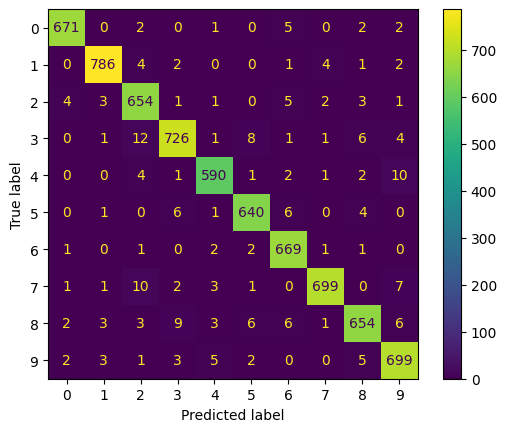

In [15]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

## Cross-validation

Previously we split the data into training and test sets. But what if the test set includes important features we want to train on that happen to be missing in the training set? We are throwing away part of our data to use it in the testing set.

Cross-validation runs the training/testing multiple times but splits the data in a different way each time. This means all of the data gets used both for training and testing. We can use multiple iterations of training with different data in each set to eventually include the entire dataset.

example list

[1,2,3,4,5,6,7,8]

train = 1,2,3,4,5,6
test = 7,8

train = 1,2,3,4,7,8
test = 5,6

train = 1,2,5,6,7,8
test = 3,4

train = 3,4,5,6,7,8
test = 1,2

(generate an image of this)

### Cross-validation code example

The `sklearn.model_selection` module provides support for doing k-fold cross validation in Scikit-Learn. It can automatically partition our data for cross validation.

Import this and call it `skl_msel`

In [16]:
import sklearn.model_selection as skl_msel

Now we can choose how many ways we would like to split our data (three or four are common choices).

In [17]:
kfold = skl_msel.KFold(4)

Now we can loop through our data and test on each combination. The `kfold.split` function returns two variables and we will have our for loop work through both of them. The train variable will contain a list of which items (by index number) we are currently using to train and the test one will contain the list of which items we are going to test on.

Inside the loop, we can select the data with `data_train = data.iloc[train]` and `labels_train = labels.iloc[train]`. In some versions of Python/Pandas/Scikit-Learn, you might be able to use `data_train = data[train]` and `labels_train = labels[train]`. This is a useful Python shorthand which will use the list of indices from `train` to select which items from `data` and `labels` we use. We can repeat this process with the test set. 

Finally, we need to train the classifier with the selected training data and then score it against the test data. The scores for each set of test data should be similar.

In [18]:
for (train, test) in kfold.split(data):
    data_train = data.iloc[train]
    labels_train = labels.iloc[train]

    data_test = data.iloc[test]
    labels_test = labels.iloc[test]

    mlp.fit(data_train,labels_train)
    print("Testing set score", mlp.score(data_test, labels_test))
    print("Testing set score", mlp.score(data_test, labels_test))

Iteration 1, loss = 0.54639789
Iteration 2, loss = 0.26230403
Iteration 3, loss = 0.21289708
Iteration 4, loss = 0.18125867
Iteration 5, loss = 0.15671447
Iteration 6, loss = 0.13829906
Iteration 7, loss = 0.12386221
Iteration 8, loss = 0.11054534
Iteration 9, loss = 0.10052223
Iteration 10, loss = 0.09241409
Iteration 11, loss = 0.08465912
Iteration 12, loss = 0.07784344
Iteration 13, loss = 0.07275192
Iteration 14, loss = 0.06758913
Iteration 15, loss = 0.06242155
Iteration 16, loss = 0.05849263
Iteration 17, loss = 0.05461676
Iteration 18, loss = 0.05166330
Iteration 19, loss = 0.04818808
Iteration 20, loss = 0.04497892
Iteration 21, loss = 0.04213046
Iteration 22, loss = 0.03993678
Iteration 23, loss = 0.03712426
Iteration 24, loss = 0.03463088
Iteration 25, loss = 0.03248927
Iteration 26, loss = 0.03068132
Iteration 27, loss = 0.02939847
Iteration 28, loss = 0.02764240
Iteration 29, loss = 0.02567754
Iteration 30, loss = 0.02387179
Iteration 31, loss = 0.02276556
Iteration 32, los

/Users/luciusjmorningstar/Desktop/ML_workshop/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.54256518
Iteration 2, loss = 0.25952030
Iteration 3, loss = 0.20625360
Iteration 4, loss = 0.17433438
Iteration 5, loss = 0.15261425
Iteration 6, loss = 0.13398319
Iteration 7, loss = 0.12017593
Iteration 8, loss = 0.10735173
Iteration 9, loss = 0.09809115
Iteration 10, loss = 0.08891589
Iteration 11, loss = 0.08093862
Iteration 12, loss = 0.07534872
Iteration 13, loss = 0.06939678
Iteration 14, loss = 0.06356675
Iteration 15, loss = 0.05854954
Iteration 16, loss = 0.05495565
Iteration 17, loss = 0.05110029
Iteration 18, loss = 0.04831831
Iteration 19, loss = 0.04451249
Iteration 20, loss = 0.04126721
Iteration 21, loss = 0.03894922
Iteration 22, loss = 0.03685076
Iteration 23, loss = 0.03395700
Iteration 24, loss = 0.03176444
Iteration 25, loss = 0.02974924
Iteration 26, loss = 0.02796288
Iteration 27, loss = 0.02608166
Iteration 28, loss = 0.02492874
Iteration 29, loss = 0.02330180
Iteration 30, loss = 0.02192814
Iteration 31, loss = 0.02006836
Iteration 32, los

/Users/luciusjmorningstar/Desktop/ML_workshop/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.54149919
Iteration 2, loss = 0.25974485
Iteration 3, loss = 0.21068448
Iteration 4, loss = 0.17637943
Iteration 5, loss = 0.15152627
Iteration 6, loss = 0.13265181
Iteration 7, loss = 0.11786617
Iteration 8, loss = 0.10497491
Iteration 9, loss = 0.09489937
Iteration 10, loss = 0.08685299
Iteration 11, loss = 0.07852097
Iteration 12, loss = 0.07247944
Iteration 13, loss = 0.06576292
Iteration 14, loss = 0.06083466
Iteration 15, loss = 0.05593988
Iteration 16, loss = 0.05200428
Iteration 17, loss = 0.04813568
Iteration 18, loss = 0.04416102
Iteration 19, loss = 0.04180168
Iteration 20, loss = 0.03865393
Iteration 21, loss = 0.03630217
Iteration 22, loss = 0.03389502
Iteration 23, loss = 0.03176238
Iteration 24, loss = 0.02945717
Iteration 25, loss = 0.02743308
Iteration 26, loss = 0.02589532
Iteration 27, loss = 0.02390609
Iteration 28, loss = 0.02281208
Iteration 29, loss = 0.02138286
Iteration 30, loss = 0.01961771
Iteration 31, loss = 0.01805493
Iteration 32, los

/Users/luciusjmorningstar/Desktop/ML_workshop/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55105535
Iteration 2, loss = 0.26876322
Iteration 3, loss = 0.21822648
Iteration 4, loss = 0.18427927
Iteration 5, loss = 0.15707964
Iteration 6, loss = 0.13746213
Iteration 7, loss = 0.12060220
Iteration 8, loss = 0.10817136
Iteration 9, loss = 0.09770065
Iteration 10, loss = 0.09025089
Iteration 11, loss = 0.08220665
Iteration 12, loss = 0.07553867
Iteration 13, loss = 0.07033994
Iteration 14, loss = 0.06541429
Iteration 15, loss = 0.06008124
Iteration 16, loss = 0.05654105
Iteration 17, loss = 0.05248864
Iteration 18, loss = 0.04876674
Iteration 19, loss = 0.04560636
Iteration 20, loss = 0.04306916
Iteration 21, loss = 0.04061065
Iteration 22, loss = 0.03840700
Iteration 23, loss = 0.03546124
Iteration 24, loss = 0.03351872
Iteration 25, loss = 0.03132123
Iteration 26, loss = 0.02900856
Iteration 27, loss = 0.02715522
Iteration 28, loss = 0.02611646
Iteration 29, loss = 0.02404803
Iteration 30, loss = 0.02249777
Iteration 31, loss = 0.02100798
Iteration 32, los

/Users/luciusjmorningstar/Desktop/ML_workshop/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Once we have established that the cross validation was ok, we can go ahead and train using the entire dataset by doing `mlp.fit(data,labels)`.

In [19]:
mlp.fit(data,labels)

Iteration 1, loss = 0.48113910
Iteration 2, loss = 0.23427976
Iteration 3, loss = 0.18567004
Iteration 4, loss = 0.15418056
Iteration 5, loss = 0.13250212
Iteration 6, loss = 0.11616587
Iteration 7, loss = 0.10288727
Iteration 8, loss = 0.09256882
Iteration 9, loss = 0.08349875
Iteration 10, loss = 0.07617581
Iteration 11, loss = 0.06986540
Iteration 12, loss = 0.06448626
Iteration 13, loss = 0.05965100
Iteration 14, loss = 0.05538264
Iteration 15, loss = 0.05122050
Iteration 16, loss = 0.04837738
Iteration 17, loss = 0.04497173
Iteration 18, loss = 0.04295863
Iteration 19, loss = 0.03974947
Iteration 20, loss = 0.03733302
Iteration 21, loss = 0.03561146
Iteration 22, loss = 0.03289452
Iteration 23, loss = 0.03170113
Iteration 24, loss = 0.02929822
Iteration 25, loss = 0.02810486
Iteration 26, loss = 0.02614949
Iteration 27, loss = 0.02499332
Iteration 28, loss = 0.02329592
Iteration 29, loss = 0.02241539
Iteration 30, loss = 0.02080464
Iteration 31, loss = 0.01966783
Iteration 32, los

/Users/luciusjmorningstar/Desktop/ML_workshop/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,1


Here is the entire example program for reference:

In [21]:
# import matplotlib.pyplot as plt
# import sklearn.datasets as skl_data
# import sklearn.neural_network as skl_nn
# import sklearn.model_selection as skl_msel

# data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)
# data = data / 255.0

# mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1)

# kfold = skl_msel.KFold(4)

# for (train, test) in kfold.split(data):
#     data_train = data.iloc[train]
#     labels_train = labels.iloc[train]

#     data_test = data.iloc[test]
#     labels_test = labels.iloc[test]
#     mlp.fit(data_train,labels_train)
#     print("Training set score", mlp.score(data_train, labels_train))
#     print("Testing set score", mlp.score(data_test, labels_test))
# mlp.fit(data,labels)

## Deep learning

Deep learning usually refers to newer neural network architectures which use a special type of network known as a 'convolutional network'. Typically, these have many layers and thousands of neurons. They are very good at tasks such as image recognition but take a long time to train and run. They are often used with GPUs (Graphical Processing Units) which are good at executing multiple operations simultaneously. It is very common to use cloud computing or high performance computing systems with multiple GPUs attached.

Scikit-Learn is not really setup for deep learning. We will have to rely on other libraries. Common choices include Google's TensorFlow, Keras, (Py)Torch or Darknet. There is, however, an interface layer between sklearn and tensorflow called skflow. A short example of using this layer can be found at [https://www.kdnuggets.com/2016/02/scikit-flow-easy-deep-learning-tensorflow-scikit-learn.html](https://www.kdnuggets.com/2016/02/scikit-flow-easy-deep-learning-tensorflow-scikit-learn.html).

### Cloud APIs

Google, Microsoft, Amazon, and many other companys now have cloud based Application Programming Interfaces (APIs) where you can upload an image and have them return you the result. Most of these services rely on a large pre-trained (and often proprietary) neural network.

::::::::::::::::::::::::::::::::::::: challenge


## Exercise: Try cloud image classification
Take a photo with your phone camera or find an image online of a common daily scene.
Upload it to Google's Vision AI at https://cloud.google.com/vision/
How many objects has it correctly classified? How many did it incorrectly classify?
Try the same image with Microsoft's Computer Vision API at https://azure.microsoft.com/en-gb/services/cognitive-services/computer-vision/
Does it do any better/worse than Google?

::::::::::::::::::::::::::::::::::::::::::::::::

{% include links.md %}

::::::::::::::::::::::::::::::::::::: keypoints 

- Perceptrons are artificial neurons which build neural networks.
- A perceptron takes multiple inputs, multiplies each by a weight value and sums the weighted inputs. It then applies an activation function to the sum.
- A single perceptron can solve simple functions which are linearly separable.
- Multiple perceptrons can be combined to form a neural network which can solve functions that aren't linearly separable.
- We can train a whole neural network with the back propagation algorithm. Scikit-learn includes an implementation of this algorithm.
- Training a neural network requires some training data to show the network examples of what to learn.
- To validate our training we split the training data into a training set and a test set.
- To ensure the whole dataset can be used in training and testing we can train multiple times with different subsets of the data acting as training/testing data. This is called cross validation.
- Deep learning neural networks are a very powerful modern machine learning technique. Scikit-Learn does not support these but other libraries like Tensorflow do.
- Several companies now offer cloud APIs where we can train neural networks on powerful computers.

::::::::::::::::::::::::::::::::::::::::::::::::